In [ ]:
import os
import random
import shutil
import cv2
import glob
import yaml
import matplotlib.pyplot as plt
import ultralytics
import numpy as np
import torch
from torchvision import transforms
from tqdm import tqdm
from PIL import Image
from ultralytics import YOLO

In [ ]:
random.seed(2024)

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'heeseonim'
os.environ['KAGGLE_KEY'] = '26149c698a6d792df8fd037246dee0e7'

In [ ]:
!kaggle datasets download -d hamdallak/the-iqothnccd-lung-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/hamdallak/the-iqothnccd-lung-cancer-dataset
License(s): CC0-1.0
 98% 147M/149M [00:07<00:00, 23.5MB/s]
100% 149M/149M [00:07<00:00, 20.2MB/s]


In [ ]:
!unzip -q the-iqothnccd-lung-cancer-dataset.zip

In [ ]:
data_root = '/content/The IQ-OTHNCCD lung cancer dataset'
# the-iqothnccd-lung-cancer-dataset아래 data 폴더 만들어줌
file_root = f'{data_root}/data'
project_name = 'lung_cancer'

# 정리할 디렉토리 정의
train_file_root = f'{data_root}/{project_name}'
train_root = f'{data_root}/{project_name}/train'
valid_root = f'{data_root}/{project_name}/valid'
test_root = f'{data_root}/{project_name}/test'

In [ ]:
# 3 종류의 클래스 디렉토리를 data 안으로 넣어줌
# file_root에 있는 모든 디렉토리와 파일을 리스트로 만듦
cls_list = os.listdir(file_root)
cls_list

['Malignant cases', 'Normal cases', 'Bengin cases']

In [ ]:
for folder in [train_root, valid_root, test_root]:
    if not os.path.exists(folder):
        os.makedirs(folder)
    for cls in cls_list:
        cls_folder = f'{folder}/{cls}'
        if not os.path.exists(cls_folder):
            os.makedirs(cls_folder)

In [ ]:
for cls in cls_list:
    file_list = os.listdir(f'{file_root}/{cls}')
    random.shuffle(file_list)
    test_ratio = 0.1
    num_file = len(file_list)
    test_list = file_list[:int(num_file*test_ratio)]
    valid_list = file_list[int(num_file*test_ratio):int(num_file*test_ratio*2)]
    train_list = file_list[int(num_file*test_ratio*2):]
    # print(test_list)
    # print(valid_list)
    # print(train_list)

    # 복사해서 넘김
    for i in test_list:
        shutil.copy(f'{file_root}/{cls}/{i}', f'{test_root}/{cls}/{i}')

    for i in valid_list:
        shutil.copy(f'{file_root}/{cls}/{i}', f'{valid_root}/{cls}/{i}')

    for i in train_list:
        shutil.copy(f'{file_root}/{cls}/{i}', f'{train_root}/{cls}/{i}')

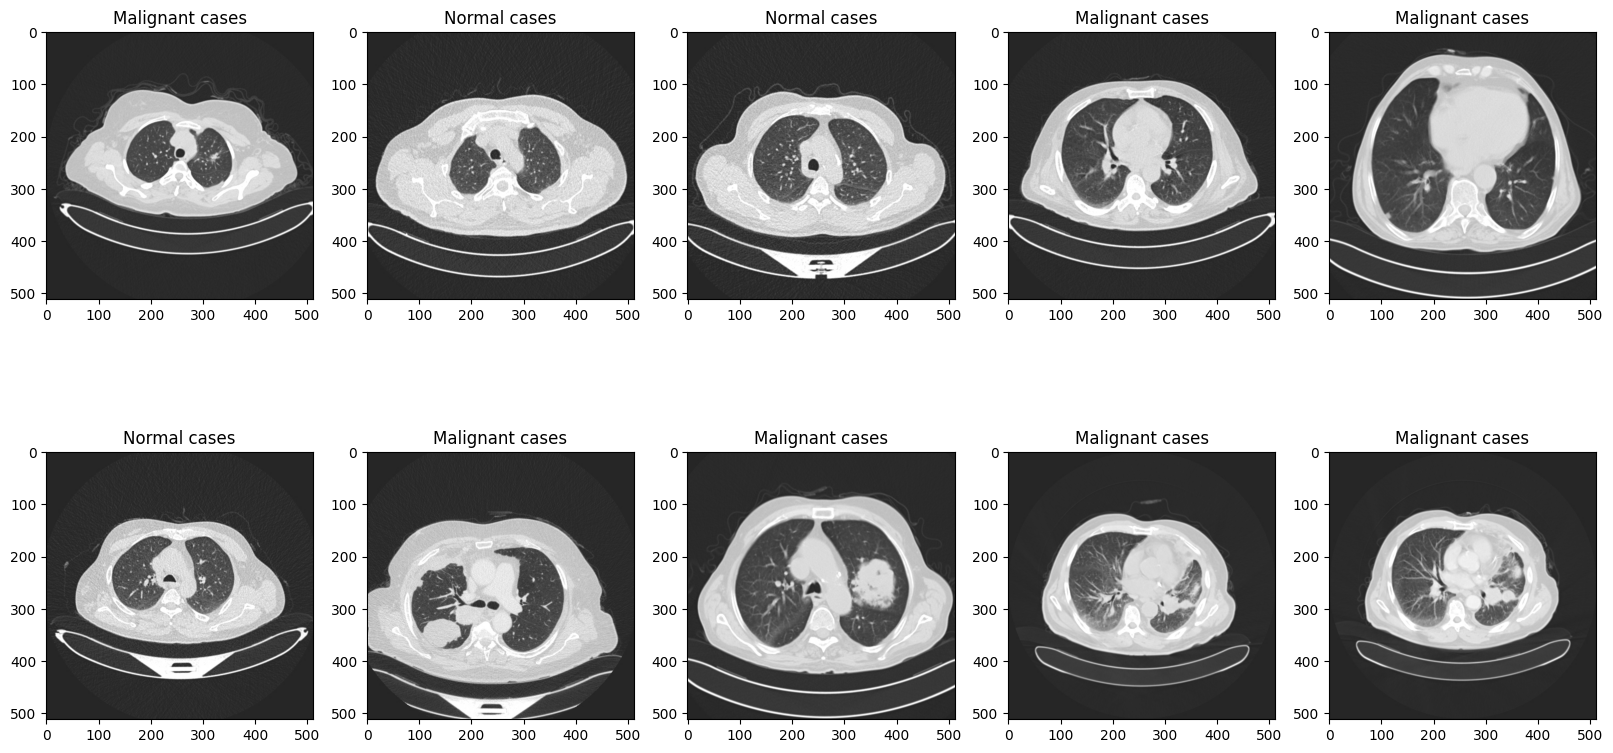

In [ ]:
test_file_list = glob.glob(f'{test_root}/*/*')
random.shuffle(test_file_list)
# test_file_list

plt.figure(figsize=(20,10))
for i in range(10):
    test_img_path = os.path.join(test_root, test_file_list[i])
    ori_imf = Image.open(test_img_path).convert('RGB')
    plt.subplot(2,5,i+1)
    plt.title(test_img_path.split('/')[-2])
    plt.imshow(ori_imf)

plt.show()

In [ ]:
project_root = '/content/The IQ-OTHNCCD lung cancer dataset/lung_cancer'

In [ ]:
# yaml 파일 만들기
data = dict()

data['train'] = train_root
data['val'] = valid_root
data['test'] = test_root
data['nc'] = len(cls_list)
data['names'] = cls_list

with open(f'{project_root}/lung_cancer.yaml', 'w') as f:
    yaml.dump(data, f)

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
# 버전체크
ultralytics.checks()
# 나머지는 환경 => CUDA사용 Python-3.10.12 사용 중

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.1/78.2 GB disk)


In [ ]:
%cd /content/The IQ-OTHNCCD lung cancer dataset/lung_cancer

/content/The IQ-OTHNCCD lung cancer dataset/lung_cancer


In [ ]:
# YOLOv8 모델 불러오기
model = YOLO('yolov8s-cls.pt')

100%|██████████| 12.3M/12.3M [00:00<00:00, 300MB/s]


In [ ]:
# patience=30 => 30 epoch 동안 개선이 없을 경우 훈련을 중지하도록 설정
results = model.train(data=f'{data_root}/{project_name}', epochs=50, batch=8, device=0, patience=30, name='lung_cancer_s')

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/The IQ-OTHNCCD lung cancer dataset/lung_cancer, epochs=50, time=None, patience=30, batch=8, imgsz=224, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=lung_cancer_s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

100%|██████████| 6.25M/6.25M [00:00<00:00, 355MB/s]


AMP: checks passed ✅


train: Scanning /content/The IQ-OTHNCCD lung cancer dataset/lung_cancer/train... 1092 images, 0 corrupt: 100%|██████████| 1092/1092 [00:02<00:00, 514.81it/s]

train: New cache created: /content/The IQ-OTHNCCD lung cancer dataset/lung_cancer/train.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/The IQ-OTHNCCD lung cancer dataset/lung_cancer/test... 203 images, 0 corrupt: 100%|██████████| 203/203 [00:00<00:00, 435.68it/s]

val: New cache created: /content/The IQ-OTHNCCD lung cancer dataset/lung_cancer/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/lung_cancer_s
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.344G      1.139          8        224:   7%|▋         | 10/137 [00:02<00:19,  6.56it/s]

       1/50     0.344G      1.145          8        224:  12%|█▏        | 16/137 [00:03<00:18,  6.60it/s]
100%|██████████| 755k/755k [00:00<00:00, 74.9MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  8.99it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  7.94it/s]

                   all      0.921          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 14.22it/s]

                   all      0.926          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 12.62it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 12.60it/s]

                   all      0.872          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 12.96it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 12.87it/s]

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  6.91it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.10it/s]

                   all      0.956          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50     0.338G     0.1549          4        224: 100%|██████████| 137/137 [00:11<00:00, 12.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.09it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.338G     0.1641          4        224: 100%|██████████| 137/137 [00:12<00:00, 10.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 12.35it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.338G     0.1559          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 12.93it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.317G      0.139          4        224: 100%|██████████| 137/137 [00:12<00:00, 10.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 12.64it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.338G     0.1113          4        224: 100%|██████████| 137/137 [00:12<00:00, 10.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 14.05it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.338G     0.1116          4        224: 100%|██████████| 137/137 [00:11<00:00, 11.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  6.71it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.338G     0.1364          4        224: 100%|██████████| 137/137 [00:17<00:00,  7.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 10.72it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50     0.338G     0.1179          4        224: 100%|██████████| 137/137 [00:11<00:00, 11.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  7.47it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50      0.34G     0.1029          4        224: 100%|██████████| 137/137 [00:10<00:00, 13.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  7.80it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.338G    0.08499          4        224: 100%|██████████| 137/137 [00:12<00:00, 11.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 11.34it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.338G    0.07813          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 12.24it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50     0.338G    0.06366          4        224: 100%|██████████| 137/137 [00:12<00:00, 10.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.27it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.338G     0.1004          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.06it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.338G    0.07822          4        224: 100%|██████████| 137/137 [00:12<00:00, 10.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.41it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.338G    0.05476          4        224: 100%|██████████| 137/137 [00:10<00:00, 12.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  7.32it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50     0.338G    0.06945          4        224: 100%|██████████| 137/137 [00:11<00:00, 12.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.26it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.338G    0.04884          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.41it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.338G    0.04635          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.61it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.338G    0.04812          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.17it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50     0.338G    0.04853          4        224: 100%|██████████| 137/137 [00:12<00:00, 11.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  7.74it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.338G    0.07239          4        224: 100%|██████████| 137/137 [00:10<00:00, 12.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.00it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50     0.338G    0.04511          4        224: 100%|██████████| 137/137 [00:11<00:00, 11.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.10it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.338G    0.03851          4        224: 100%|██████████| 137/137 [00:12<00:00, 10.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.64it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50     0.317G    0.04275          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.74it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.338G    0.04561          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.26it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50     0.317G    0.03792          4        224: 100%|██████████| 137/137 [00:12<00:00, 10.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  8.21it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.338G    0.04412          4        224: 100%|██████████| 137/137 [00:10<00:00, 12.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  8.72it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50     0.338G    0.04067          4        224: 100%|██████████| 137/137 [00:11<00:00, 12.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 12.01it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.338G    0.04257          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.40it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50     0.338G    0.03911          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 12.24it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50     0.338G    0.03381          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 12.31it/s]

                   all      0.995          1



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


      41/50     0.338G    0.03386          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  8.36it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.338G    0.02421          4        224: 100%|██████████| 137/137 [00:11<00:00, 11.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  7.27it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50     0.338G    0.02525          4        224: 100%|██████████| 137/137 [00:10<00:00, 12.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  7.62it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.338G    0.03074          4        224: 100%|██████████| 137/137 [00:12<00:00, 11.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 12.26it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50     0.338G    0.02288          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 14.06it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50     0.338G    0.02454          4        224: 100%|██████████| 137/137 [00:13<00:00, 10.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.04it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.338G    0.02624          4        224: 100%|██████████| 137/137 [00:14<00:00,  9.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 14.01it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50     0.338G    0.03467          4        224: 100%|██████████| 137/137 [00:11<00:00, 11.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  8.94it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50     0.317G     0.0266          4        224: 100%|██████████| 137/137 [00:11<00:00, 11.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  7.39it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.338G    0.02545          4        224: 100%|██████████| 137/137 [00:11<00:00, 12.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 11.74it/s]

                   all      0.995          1



50 epochs completed in 0.204 hours.
Optimizer stripped from runs/classify/lung_cancer_s/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/lung_cancer_s/weights/best.pt, 10.3MB

Validating runs/classify/lung_cancer_s/weights/best.pt...
Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,079,043 parameters, 0 gradients, 12.5 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/The IQ-OTHNCCD lung cancer dataset/lung_cancer/train... found 1092 images in 3 classes ✅ 
val: None...
test: /content/The IQ-OTHNCCD lung cancer dataset/lung_cancer/test... found 203 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.26it/s]


                   all          1          1
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/lung_cancer_s
Results saved to runs/classify/lung_cancer_s


In [ ]:
result_folder = f'{project_root}/runs/classify/lung_cancer_s'

In [ ]:
model = YOLO(f'{result_folder}/weights/best.pt')
# model

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [ ]:
metrics = model.val(split='test')
metrics

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,079,043 parameters, 0 gradients, 12.5 GFLOPs
train: /content/The IQ-OTHNCCD lung cancer dataset/lung_cancer/train... found 1092 images in 3 classes ✅ 
val: None...
test: /content/The IQ-OTHNCCD lung cancer dataset/lung_cancer/test... found 203 images in 3 classes ✅ 


test: Scanning /content/The IQ-OTHNCCD lung cancer dataset/lung_cancer/test... 203 images, 0 corrupt: 100%|██████████| 203/203 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.50it/s]


                   all          1          1
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d33f2f5de70>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/val')
speed: {'preprocess': 0.06526679241011296, 'inference': 2.8244168887584666, 'loss': 0.002325462003059575, 'postprocess': 0.02772467476981027}
task: 'classify'
top1: 1.0
top5: 1.0

In [ ]:
print('top1 accuracy: ', metrics.top1)
print('top5 accuracy: ', metrics.top5)
# 둘다 100프로 나옴

top1 accuracy:  1.0
top5 accuracy:  1.0


In [ ]:
IMG_SIZE = (512, 512)
test_data_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor()
])

In [ ]:
img = Image.open(test_file_list[0]).convert('RGB')
img_src = test_data_transform(img)
print(img_src.shape)
x_tensor = img_src.unsqueeze(0)
print(x_tensor.shape)

torch.Size([3, 512, 512])
torch.Size([1, 3, 512, 512])


In [ ]:
result = model(x_tensor)[0]


0: 512x512 Malignant cases 0.90, Normal cases 0.08, Bengin cases 0.02, 59.5ms
Speed: 1.0ms preprocess, 59.5ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


In [ ]:
gt = test_file_list[0].split('/')[-2]
pt = model.names[torch.argmax(result.probs.data).item()]
print(gt)
print(pt)

Malignant cases
Malignant cases


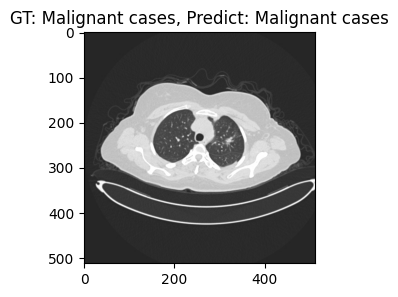

In [ ]:
plt.figure(figsize=(3, 3))
plt.title(f'GT: {gt}, Predict: {pt}')
plt.imshow(np.array(img))
plt.show()


0: 512x512 Malignant cases 0.90, Normal cases 0.08, Bengin cases 0.02, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 12.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 Normal cases 0.66, Bengin cases 0.34, Malignant cases 0.00, 5.3ms
Speed: 1.0ms preprocess, 5.3ms inference, 8.3ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 Normal cases 0.88, Bengin cases 0.12, Malignant cases 0.00, 6.6ms
Speed: 1.0ms preprocess, 6.6ms inference, 6.3ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 Normal cases 0.49, Bengin cases 0.25, Malignant cases 0.25, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 Malignant cases 0.99, Bengin cases 0.01, Normal cases 0.01, 5.7ms
Speed: 1.1ms preprocess, 5.7ms inference, 6.2ms postprocess per image at shape (1, 3, 512, 512)


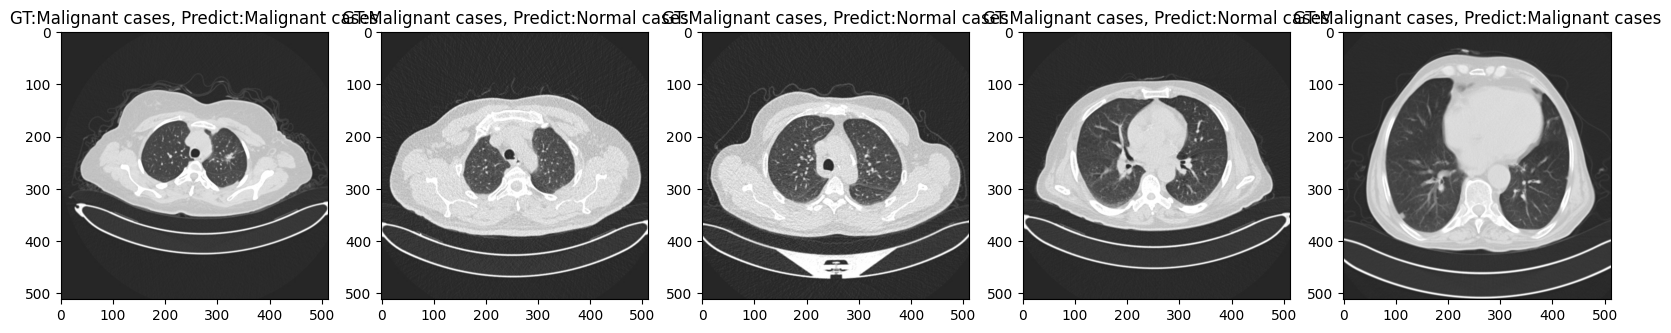

In [ ]:
# 전체적으로 시각화
plt.figure(figsize=(20,5))

for idx in range(5):
    img = Image.open(test_file_list[idx]).convert('RGB')
    img_src = test_data_transform(img)
    x_tensor = img_src.unsqueeze(0)
    result = model.predict(x_tensor)[0]
    gt = test_file_list[0].split('/')[-2]
    pt = model.names[torch.argmax(result.probs.data).item()]
    plt.subplot(1, 5, (idx+1))
    plt.title(f'GT:{gt}, Predict:{pt}')
    plt.imshow(img)

plt.show()